# Hands on Classificación
## Minería de Datos 2021

### 1.- Cancer Cérvico Uterino

Más de 300.000 mujeres mueren anualmente a causa del Cáncer Cérvico Uterino (CaCu). Para detectar el CaCu se utilizan distintos métodos: el más conocido es el Frotis de Papanicolaou (PAP) que consiste en el raspado de células del cérvix, las que son analizadas en laboratorio para detectar anomalías (Citología). A pesar de todas las cualidades que el PAP ostenta, tiene bastantes falsos positivos y aún mas falsos negativos.  Otro exámen es la colposcopía (de Hinselmann y de Schiller) que son exámenes que realiza el mismo Ginecólogo en su consulta, y por lo tanto propensos a errores. La prueba más concluyente corresponde a la biopsia, pero al ser invasiva, dirigida y costosa, es el último método de confirmación del CaCu. El predecir los resultados de la biopsia basados en los examenes previos y los datos clínicos del paciente, ayuda a focalizar estos exámenes adecuadamente.

En este taller utilizaremos un dataset llamado `cacu.csv` que puede encontrar en el aula (junto a este archivo). Este dataset contiene variables que mayormente son autoexplicativas (e.g., edad, si es fumadora, si utiliza métodos anticonceptivos, etc.). Sin embargo, se utilizan siglas médicas que continuación se detallan:

* IUD - Intra Uterine Device (a form of contraceptive)
* STDs - Sexually Transmitted Diseases
* HPV - Human Papilloma Virus
* HIV - Human Immunodeficiency Virus
* AIDS - Acquired Immunodeficiency Syndrome (caused by HIV)
* CIN - Cervical Intraepithelial Neoplasia
* Dx - Medical Abbreviation for Diagnosis

Este estudio consta de 858 pacientes a las que se le realizaron los 4 exámenes (las 4 últimas columnas: Hinselmann, Schiller, Citology, Biopsy), y se les recolectaron los datos demográficos y clínicos. 

### 1.1. Carga de Datos
Naturalmente, no toda la información pudo ser recolectada, por lo que cuando se desconoce algún dato se reemplaza por '?'. Utilice pandas para cargar los datos y reemplazar los '?' por el ya conocido indicador NaN. Reporte cuantas entradas no están disponibles por cada columna.

In [1]:
import pandas
df = pandas.read_csv('cacu.csv',na_values='?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

**PREGUNTA**: Elimine las columnas que tienen menos de 50% de datos validos y reporte la cantidad de pacientes que tienen al menos un campo en NaN. ¿Qué puede pasar si eliminamos las características que tienen algunos NaNs? ¿Qué puede pasar si eliminamos a las pacientes que tienen algunos NaNs? 

In [2]:
df=df.drop(['STDs: Time since first diagnosis'],axis=1)
df=df.drop('STDs: Time since last diagnosis',axis=1)

In [3]:
(df.isnull().sum(axis=1)!=0).sum()

190

### 1.2. Imputación de Datos
Para evitar perder información valiosa, vamos inputar los datos faltantes. Genere un vector los nombres de las características incompletas (columnas con NaN) que son de tipo binarias, otro vector con las características de tipo numéricas, y otro con las características de tipo real. Reemplace los NaNs de las características binarias por -1 (representando el concepto de desconocido), y reemplace las variables naturales con su media.

In [4]:
cols=df.columns[df.isnull().sum() > 0]

In [5]:
num_cols = cols[[0,1,2,4,5,7,9,11]]
bin_cols = cols[[3,6,8,10]].append(cols[12:])
num_cols

Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)'],
      dtype='object')

In [6]:
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())
df[bin_cols]=df[bin_cols].fillna(-1)

In [7]:
bin_cols

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV'],
      dtype='object')

**PREGUNTA**: ¿Qué efectos puede tener esta estrategia de imputación? Justifique utilizando los estadísticos descriptivos (``describe()``) de pandas.

In [8]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.128205,1.219721,0.453144,0.434732,2.256419,-0.039627,...,-0.120047,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.377144,4.057885,2.209657,0.705740,3.519082,0.481456,...,0.332304,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.3 Preparación de Datos
Defina un subconjunto de testing del 20% de los datos de forma aleatoria, y separe la característica ``Biopsy`` como la variable target.  

In [9]:
import sklearn.model_selection
train,test = sklearn.model_selection.train_test_split(df, test_size=0.2)

**PREGUNTA**: Genere un diagrama de dispersión entre la edad y el número de embarazos de las pacientes. Distinga en diferentes colores aquellos que pertenecen al conjunto de training y testing. ¿Cree que el testing es representativo? (puede correr el split varias veces). ¿A qué sesgos puede llevarnos un mal split?

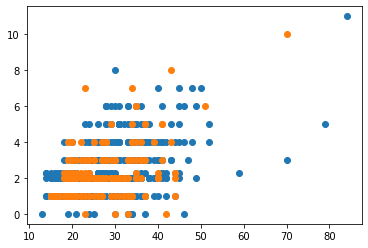

In [10]:
import matplotlib.pyplot as plt
plt.scatter(train[['Age']],train[['Num of pregnancies']])
plt.scatter(test[['Age']],test[['Num of pregnancies']])
plt.show()



In [11]:
y_train = train['Biopsy'].to_numpy().ravel()
y_test = test['Biopsy'].to_numpy().ravel()
X_train = train.drop('Biopsy',axis=1)
X_test = test.drop('Biopsy',axis=1)

In [12]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
694,28,2.0,15.0,2.275561,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
216,29,3.0,17.0,3.000000,1.0,10.0,2.00,1.0,6.000000,0.0,...,0.0,0.0,0,0,0,0,0,1,1,0
201,26,4.0,17.0,4.000000,1.0,2.0,0.20,0.0,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
776,17,1.0,16.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
199,27,2.0,18.0,2.000000,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,16,1.0,15.0,1.000000,0.0,0.0,0.00,1.0,1.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
461,15,3.0,15.0,2.000000,0.0,0.0,0.00,0.0,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
579,36,6.0,15.0,4.000000,1.0,16.0,1.60,1.0,5.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
360,24,1.0,20.0,2.000000,0.0,0.0,0.00,1.0,3.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


### 2.- Evaluación de Classificadores

Considere los siguientes clasificadores
1. Nearest Neighbors Classifier with 3 neighbors
1. Support Vector Machine with Linear Kernel with $C=0.03$
1. Support Vector Machine with Radial Basis Function with C=1.0, $\gamma=1.5$
1. Gaussian Process Classifier with a squared exponential kernel of $\sigma = 1.0$ and amplitude also $1.0$
1. Random Forest with maximum depth of 6 and 10 estimators 
1. Artificial Neural Network with $\alpha = 1$
1. Naive Bayes
1. Quadratic Discriminant Analysis

**2.1.-** Evalue el desempeño de los clasificadores

Imprima la curva ROC de cada clasificador y reporte su accuracy, F1-score y AUC utilizando los conjuntos seleccionados en la pregunta anterior. Además, mida el tiempo de entrenamiento y el tiempo de clasificación de cada uno.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [14]:
names = ["Nearest Neighbors","SVM Linear", "SVM rbf","GP","RF","Neural Net", #"AdaBoost",
         "Naive Bayes", "QDA"]        
        
classifiers = [
    KNeighborsClassifier(30),
    SVC(kernel="linear", C=0.03, probability = True),
    SVC(gamma=1.5, C=1, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    #DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10),
    MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [16]:
import time

In [23]:
clfvar = KNeighborsClassifier(30)
clfvar.fit(X_train, y_train)
clfvar.predict_proba(X_test).shape

(172, 2)

Nearest Neighbors 0.0043468475341796875 0.025799274444580078
SVM Linear 0.08991694450378418 0.004393339157104492
SVM rbf 0.3515148162841797 0.032961130142211914
GP 2.992263078689575 0.010506153106689453
RF 0.022932052612304688 0.004798173904418945


/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/IkeMercado/opt/miniconda3/envs/datamining/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Net 1.4753389358520508 0.005727052688598633
Naive Bayes 0.007292747497558594 0.002966165542602539
QDA 0.007147073745727539 0.0026857852935791016


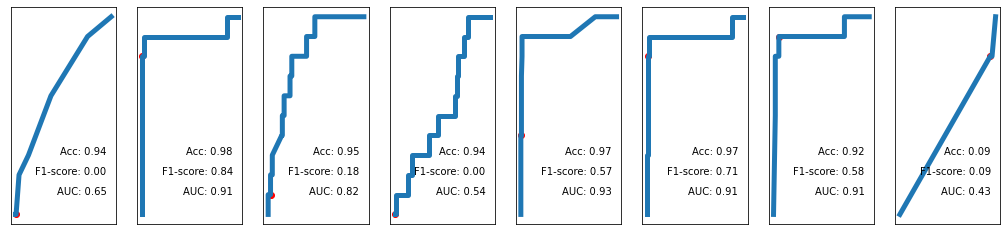

In [16]:
i=1
plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1 , len(classifiers) + 1, i)
        

        start = time.time()
        # fit the model using the training set
        clf.fit(X_train, y_train)
        end = time.time()
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)
        end2 = time.time()
        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')
        print(name,str(end-start),str(end2 - end))
        # counter 
        i += 1

**PREGUNTA**: Fundamente la selección del mejor clasificador basandose tanto en las 3 métricas de rendimiento como en los tiempos de cómputo. ¿Cómo es posible tener valores elevados de AUC pero bajos en F1-score? ¿Podría pasar lo contrario (altos en F1-score, bajos en AUC)?

In [17]:
X_train.shape

(686, 33)

**2.2.-** Realice un *gridsearch* para algún parámetro del clasificador seleccionado y reporte los resultados. Muestre las diferencias entre el parámetro original y su mejor resultado ocupando los datos de testing.

In [ ]:
from sklearn.model_selection import GridSearchCV
sv =SVC(kernel="linear", probability = True)
parameters = {'C':[0.001,10.0]}
clf = GridSearchCV(sv, parameters,scoring='f1')
clf.fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_test_pred)
acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)

auc,acc,f1

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
parameters = {'max_depth':[10,15],'n_estimators':[10,15]}
#max_depth=10, n_estimators=10
clf = GridSearchCV(rf, parameters,scoring='f1')
clf.fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_test_pred)
acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)

auc,acc,f1

**PREGUNTA FINAL**: ¿Puede usted argumentar que el mejor resultado que usted encontró con este *gridsearch* no es debido a simple variabilidad en los resultados?

In [ ]:
metrics.confusion_matrix(y_test, y_test_pred >= 0.5)